<a href="https://colab.research.google.com/github/GuyAvni1/Final-Project-Guy-Ori/blob/main/Code/Prediction_60m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the data set from the drive
raw = pd.read_csv("/content/drive/MyDrive/Final_Project_Data/future_of_48m.csv")
# print(raw)
data = raw
# Define a mapping of labels to numerical values to creater baseline lable feature for training
label_mapping = {'CN': 0,'MCI': 1,  'Dementia': 2}

# Apply label encoding to the 'DX' column
data['DX'] = data['DX'].map(label_mapping)
data #Showing an example of the first 5 rows.


,RID,VISCODE,DX,FDG,AV45,ABETA,TAU,PTAU,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,MOCA,RAVLT_learning,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,Transition
0,8,0,0,1.209650,1.021804,1700.000000,440.200000,37.510000,0.0,5.00,7.00,28.0,51.0,3.0,25.00000,0.0,25.037229,7.0,18757.000000,6080.000000,9.486840e+05,4190.000000,14043.000000,20076.000000,1.396070e+06,CNtoCN
1,8,12,0,1.175050,1.049014,1700.000000,397.700000,34.280000,0.0,3.00,5.00,28.0,42.0,5.0,50.00000,0.0,24.596106,5.0,37297.615921,6777.052702,9.866253e+05,3603.074759,17443.920391,19002.838608,1.526902e+06,CNtoCN
2,8,36,0,1.253530,1.092582,1233.218897,428.612179,41.181601,0.0,6.33,9.33,29.0,44.0,6.0,50.00000,0.0,25.125017,7.0,24710.063054,7999.672176,1.079309e+06,4045.676692,19288.594171,22081.719685,1.584148e+06,CNtoCN
3,8,48,0,1.179365,1.093910,1181.735760,426.865393,40.759150,0.0,13.00,17.00,30.0,49.0,4.0,26.66670,0.0,25.330426,9.0,39572.453761,7809.100937,1.073322e+06,4157.843398,18518.618597,21665.897115,1.649316e+06,CNtoCN
4,8,72,0,1.230678,1.033934,1644.518866,426.957080,39.822884,0.0,9.00,13.00,29.0,47.0,5.0,45.45450,0.0,24.000000,6.0,24318.815507,7434.220253,1.055726e+06,4238.133154,19176.452663,20840.038994,1.537239e+06,CNtoMCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,6580,0,0,1.192599,1.136356,1055.163181,418.132500,39.595107,0.0,10.33,16.33,27.0,30.0,5.0,62.50000,0.0,24.000000,3.0,63055.700000,6824.300000,9.162650e+05,3604.000000,18194.000000,19633.000000,1.326620e+06,CNtoCN
1940,6581,0,0,1.292795,1.107553,1312.965484,424.073483,40.778235,0.0,3.33,6.33,30.0,60.0,1.0,7.14286,0.0,28.000000,8.0,61263.200000,8346.200000,1.203690e+06,3457.000000,20879.000000,23223.000000,1.708600e+06,CNtoCN
1941,6586,0,1,1.116790,1.240984,748.690264,412.114058,39.138017,1.0,10.67,14.67,27.0,27.0,3.0,50.00000,0.0,21.000000,2.0,49620.300000,7323.400000,1.109000e+06,4474.000000,18957.000000,22376.000000,1.553610e+06,MCItoMCI
1942,6635,0,1,1.300330,1.156160,1140.371540,428.120509,42.835446,1.0,8.67,12.67,28.0,51.0,0.0,0.00000,0.0,23.000000,4.0,21121.284551,8230.122079,1.103257e+06,4078.818244,19307.735806,22885.823078,1.544989e+06,MCItoMCI


In [5]:
labels = data[['Transition']]
train_data = data.drop(['Transition','RID','VISCODE'], axis = 1)
print("Shape of the training set: {}".format(train_data.shape))

Shape of the training set: (1944, 23)


In [6]:
labels.value_counts()

Transition
CNtoCN        794
MCItoMCI      613
MCItoAD       291
CNtoMCI       121
ADtoAD         99
CNtoAD         26
dtype: int64

In [7]:
# Splitting the data into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.3, stratify=labels)
print("Number of train samples:" + str(len(X_train)))
print("Number of test samples:" + str(len(X_test)))

Number of train samples:1360
Number of test samples:584


In [8]:
print("Training set distribution:\n{}\n\n".format(y_train['Transition'].value_counts()))
print("Test set distribution:\n{}".format(y_test['Transition'].value_counts()))

Training set distribution:
CNtoCN      555
MCItoMCI    429
MCItoAD     204
CNtoMCI      85
ADtoAD       69
CNtoAD       18
Name: Transition, dtype: int64


Test set distribution:
CNtoCN      239
MCItoMCI    184
MCItoAD      87
CNtoMCI      36
ADtoAD       30
CNtoAD        8
Name: Transition, dtype: int64


In [9]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

# **%%%%%%%%%%%%%%%RANDOM FOREST MODEL%%%%%%%%%%%%%%%%%**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = []
models = []
model_RFC = RandomForestClassifier(random_state=42) #Using Random Forest Classifier model
model_RFC.fit(X_train,y_train) #Training
y_pred_rfc = model_RFC.predict(X_test) #Predictions
print("Model accuracy: " + str(accuracy_score(y_test,y_pred_rfc)))
print(classification_report(y_test,y_pred_rfc))
print(model_RFC.classes_)
accuracies.append(round(100*accuracy_score(y_test,y_pred_rfc),3))
models.append('RFC')

<ipython-input-10-fdad10553bd2>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X_train,y_train) #Training


Model accuracy: 0.8458904109589042
              precision    recall  f1-score   support

      ADtoAD       1.00      1.00      1.00        30
      CNtoAD       0.00      0.00      0.00         8
      CNtoCN       0.85      0.99      0.91       239
     CNtoMCI       0.40      0.06      0.10        36
     MCItoAD       0.77      0.68      0.72        87
    MCItoMCI       0.86      0.91      0.88       184

    accuracy                           0.85       584
   macro avg       0.65      0.60      0.60       584
weighted avg       0.81      0.85      0.82       584

['ADtoAD' 'CNtoAD' 'CNtoCN' 'CNtoMCI' 'MCItoAD' 'MCItoMCI']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


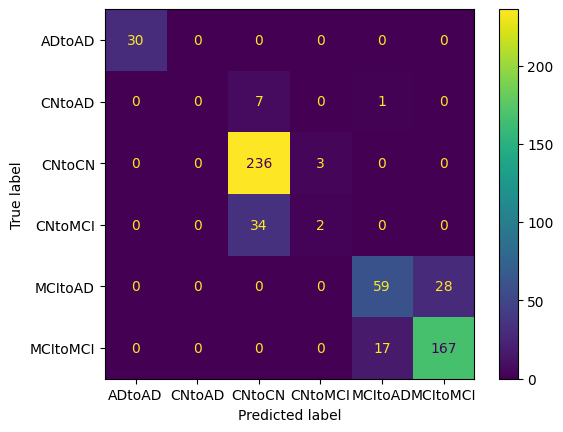

In [11]:
cm = confusion_matrix(y_test, y_pred_rfc, labels = model_RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = model_RFC.classes_)
disp.plot()

# **%%%%%%%%%%%%%%%XGBOOST MODEL%%%%%%%%%%%%%%%%%**

In [12]:
list_labels = list(labels.Transition)
label_converter = {
    "ADtoAD": 0,
    "CNtoCN": 1,
    "CNtoMCI": 2,
    "MCItoAD": 3,
    "MCItoMCI": 4,
    "CNtoAD": 5

}


def convert_labels(labels):
    converted_labels = [label_converter[label] for label in labels]
    return converted_labels


In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)
y_train_list = list(y_train.Transition)
y_test_list = list(y_test.Transition)

# Convert the training and testing sets into DMatrix format (specific to XGBoost)
y_train1 = convert_labels(y_train_list)
y_test1 = convert_labels(y_test_list)
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train1)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test1)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # for multi-class classification
    'num_class': len(label_converter),  # number of classes
    'eval_metric': 'merror',  # evaluation metric
    'eta': 0.1,  # learning rate
    'max_depth': 3  # maximum depth of each tree
}

# Train the XGBoost model
num_rounds = 100  # number of boosting rounds
model_XGB = xgb.train(params, train_dmatrix, num_rounds)

# Make predictions on the testing set
y_pred_xgb = model_XGB.predict(test_dmatrix)

# Evaluate the model
print("Model accuracy: " + str(accuracy_score(y_test1,y_pred_xgb)))
print(classification_report(y_test1,y_pred_xgb))
print(label_converter)
accuracies.append(round(100*accuracy_score(y_test1,y_pred_xgb),3))
models.append('XGB')

Model accuracy: 0.8304794520547946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.86      0.97      0.91       239
           2       0.25      0.08      0.12        36
           3       0.72      0.68      0.70        87
           4       0.85      0.88      0.86       184
           5       0.33      0.12      0.18         8

    accuracy                           0.83       584
   macro avg       0.67      0.62      0.63       584
weighted avg       0.80      0.83      0.81       584

{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4, 'CNtoAD': 5}


{'ADtoAD': 0, 'CNtoCN': 1, 'CNtoMCI': 2, 'MCItoAD': 3, 'MCItoMCI': 4, 'CNtoAD': 5}


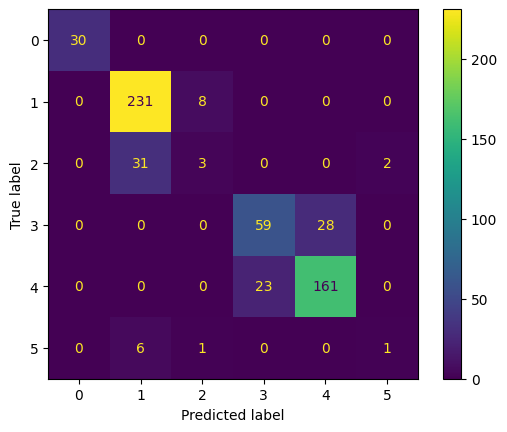

In [14]:
print(label_converter)
cm = confusion_matrix(y_test1, y_pred_xgb, labels = list(label_converter.values()))
disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = list(label_converter.values()))
disp.plot()

# **%%%%%%%%%%%%%SUMMERIZE%%%%%%%%%%%%%%%**

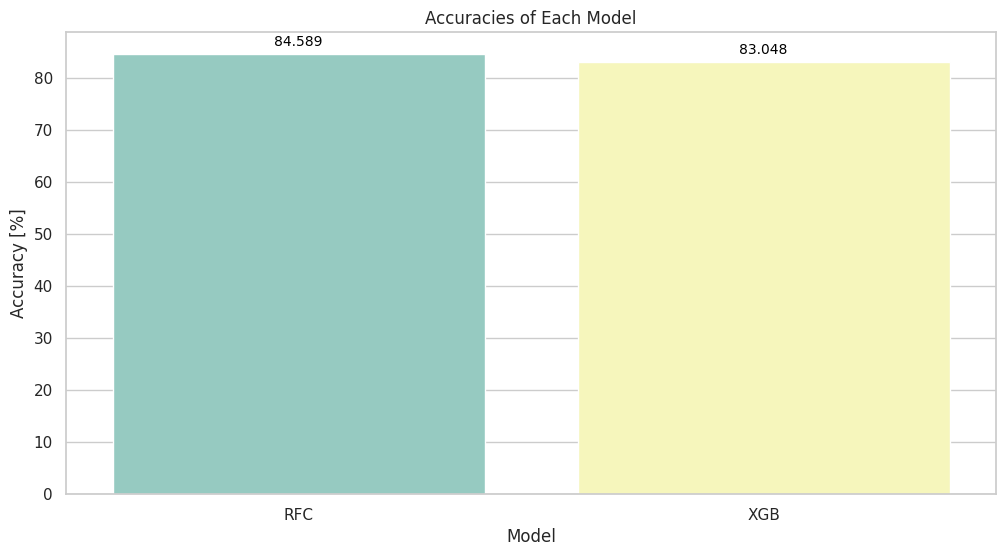

In [15]:
# Create a bar plot
plt.figure(figsize = (12,6))
sns.set(style="whitegrid")  # Optional: Set a seaborn style
ax = sns.barplot(x=models, y=accuracies, palette = "Set3")


# Add labels and a title
plt.xlabel("Model")
plt.ylabel("Accuracy [%]")
plt.title("Accuracies of Each Model")

# Display the values in the center of each bar
for i, v in enumerate(accuracies):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.show()